In [1]:
# Step a) Data preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [48]:

# Load the dataset
data = pd.read_csv('ds_salaries.csv')


In [53]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3.0,2.0,84.0,80000,EUR,85847,26.0,100,25.0,0.0
1,2023,2.0,0.0,66.0,30000,USD,30000,75.0,100,70.0,2.0
2,2023,2.0,0.0,66.0,25500,USD,25500,75.0,100,70.0,2.0
3,2023,3.0,2.0,47.0,175000,USD,175000,11.0,100,12.0,1.0
4,2023,3.0,2.0,47.0,120000,USD,120000,11.0,100,12.0,1.0


In [41]:
print("work_year null count: ",data['work_year'].isnull().sum())
print("experience_level null count: ",data['experience_level'].isnull().sum())
print("employment_type null count: ",data['employment_type'].isnull().sum())
print("job_title null count: ",data['job_title'].isnull().sum())
print("salary_currency null count: ",data['salary_currency'].isnull().sum())
print("salary_in_usd null count: ",data['salary_in_usd'].isnull().sum())
print("employee_residence null count: ",data['employee_residence'].isnull().sum())
print("remote_ratio null count: ",data['remote_ratio'].isnull().sum())
print("company_location null count: ",data['company_location'].isnull().sum())
print("company_size null count: ",data['company_size'].isnull().sum())


work_year null count:  0
experience_level null count:  0
employment_type null count:  0
job_title null count:  0
salary_currency null count:  0
salary_in_usd null count:  0
employee_residence null count:  0
remote_ratio null count:  0
company_location null count:  0
company_size null count:  0


In [17]:
data['work_year'].describe()


count    3755.000000
mean     2022.373635
std         0.691448
min      2020.000000
25%      2022.000000
50%      2022.000000
75%      2023.000000
max      2023.000000
Name: work_year, dtype: float64

In [20]:
print(data['experience_level'].describe())
print(data['experience_level'].value_counts())

count     3755
unique       4
top         SE
freq      2516
Name: experience_level, dtype: object
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


In [21]:
print(data['employment_type'].describe())
print(data['employment_type'].value_counts())

count     3755
unique       4
top         FT
freq      3718
Name: employment_type, dtype: object
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


In [22]:
print(data['job_title'].describe())
print(data['job_title'].value_counts())

count              3755
unique               93
top       Data Engineer
freq               1040
Name: job_title, dtype: object
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64


In [23]:
print(data['salary_currency'].describe())
print(data['salary_currency'].value_counts())


count     3755
unique      20
top        USD
freq      3224
Name: salary_currency, dtype: object
salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64


In [24]:
print(data['salary_in_usd'].describe())
print(data['salary_in_usd'].value_counts())

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
salary_in_usd
100000    99
150000    98
120000    91
160000    84
130000    82
          ..
234100     1
223800     1
172100     1
232200     1
94665      1
Name: count, Length: 1035, dtype: int64


In [25]:
print(data['employee_residence'].describe())
print(data['employee_residence'].value_counts())


count     3755
unique      78
top         US
freq      3004
Name: employee_residence, dtype: object
employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64


In [26]:
print(data['remote_ratio'].describe())
print(data['remote_ratio'].value_counts())

count    3755.000000
mean       46.271638
std        48.589050
min         0.000000
25%         0.000000
50%         0.000000
75%       100.000000
max       100.000000
Name: remote_ratio, dtype: float64
remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64


In [27]:
print(data['company_location'].describe())
print(data['company_location'].value_counts())

count     3755
unique      72
top         US
freq      3040
Name: company_location, dtype: object
company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64


In [28]:
print(data['company_size'].describe())
print(data['company_size'].value_counts())

count     3755
unique       3
top          M
freq      3153
Name: company_size, dtype: object
company_size
M    3153
L     454
S     148
Name: count, dtype: int64


In [58]:
drop_columns = ['salary', 'salary_currency']
data.drop(columns=drop_columns,inplace=True)


In [51]:
data['experience_level']=pd.Categorical(data['experience_level']).codes.astype(float)
data['employment_type'] = pd.Categorical(
    data['employment_type']).codes.astype(float)


In [52]:

data['job_title']=pd.Categorical(data['job_title']).codes.astype(float)
data['employee_residence']=pd.Categorical(data['employee_residence']).codes.astype(float)
data['company_location']=pd.Categorical(data['company_location']).codes.astype(float)
data['company_size'] = pd.Categorical(data['company_size']).codes.astype(float)


In [ ]:

# Perform data preprocessing steps (e.g., handle missing values, encode categorical variables)


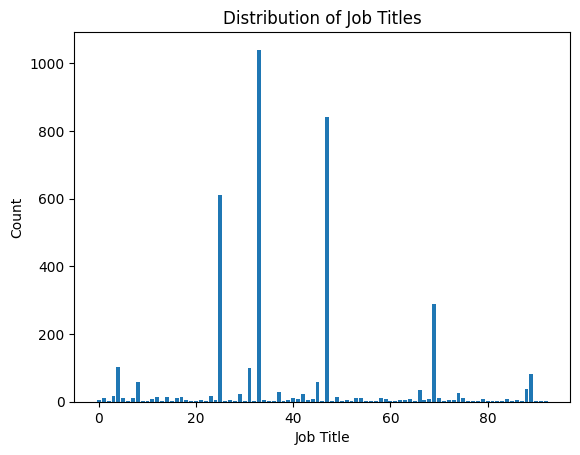

In [45]:

# Step b) Extract useful information using data visualization and considering the "job_title" column

# Example: Plotting a bar plot of job titles
job_title_counts = data['job_title'].value_counts()
plt.bar(job_title_counts.index, job_title_counts.values)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Titles')
plt.show()


In [60]:

# Step c) Split the dataset into train and test
# Replace 'target_variable' with your actual target column name
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [59]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3.0,2.0,84.0,85847,26.0,100,25.0,0.0
1,2023,2.0,0.0,66.0,30000,75.0,100,70.0,2.0
2,2023,2.0,0.0,66.0,25500,75.0,100,70.0,2.0
3,2023,3.0,2.0,47.0,175000,11.0,100,12.0,1.0
4,2023,3.0,2.0,47.0,120000,11.0,100,12.0,1.0


In [61]:
# Step d) Train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the DecisionTreeClassifier with max depth 2
decision_tree = DecisionTreeClassifier(max_depth=2)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [62]:

# Step e) Report model accuracy of the decision tree model
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree accuracy:", accuracy_tree)


Decision Tree accuracy: 0.03195739014647137


In [65]:

# Step f) Train the data in the leaf using another arbitrary algorithm (Random Forest in this example)
random_forest = RandomForestClassifier()

# Extract the leaf node assignments from the decision tree model
leaf_assignments = decision_tree.apply(X_train)
leaf_assignments = leaf_assignments.reshape(-1, 1)
# Fit the random forest model on the leaf node assignments
random_forest.fit(leaf_assignments, y_train)

# Step g) Report model accuracy of the arbitrary algorithm (Random Forest) trained on the leaf node assignments
leaf_assignments_test = decision_tree.apply(X_test)
leaf_assignments_test = leaf_assignments_test.reshape(-1, 1)
y_pred_rf = random_forest.predict(leaf_assignments_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy (trained on leaf node assignments):", accuracy_rf)


Random Forest accuracy (trained on leaf node assignments): 0.033288948069241014
